c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


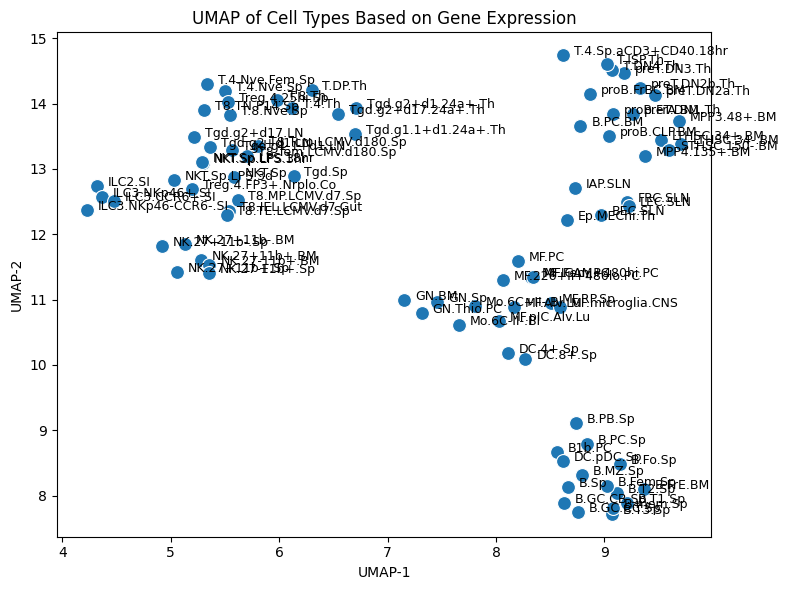

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

RNA_seq_path=r"C:\Users\helen\Downloads\datasets\mmc2.csv"
RNA_seq=pd.read_csv(RNA_seq_path,index_col=0)
RNA_seq_T=RNA_seq.T

RNA_seq_log = np.log1p(RNA_seq_T)  

scaler = StandardScaler()
RNA_seq_scaled = scaler.fit_transform(RNA_seq_log)

reducer = umap.UMAP(random_state=42)
umap_RNA_prep= reducer.fit_transform(RNA_seq_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_RNA_prep[:, 0], y=umap_RNA_prep[:, 1], s=100)


for i, label in enumerate(RNA_seq_T.index):
    plt.text(umap_RNA_prep[i, 0]+0.1, umap_RNA_prep[i, 1], label, fontsize=9)

plt.title("UMAP of Cell Types Based on Gene Expression")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

Now that we have our UMAP we will perform and compare the elbow and silhouette method to determine the optimal amount of clusters for kmeans clustering

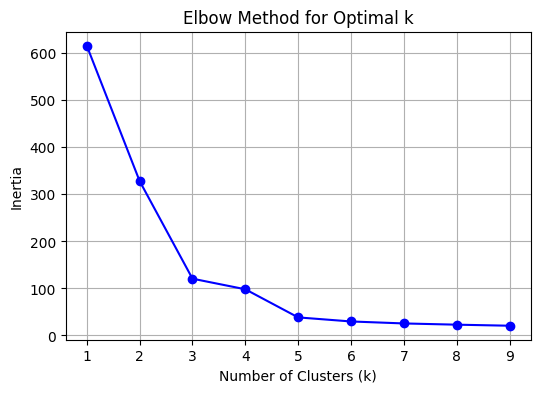

In [3]:
#elbow method to determine amount of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

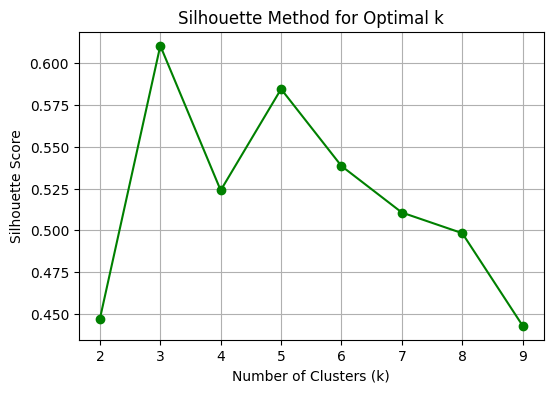

In [4]:
#test silhouette sore for kmeans clusterin
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):  # must be ≥2
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    labels = kmeans.labels_
    score = silhouette_score(umap_RNA_prep, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

-> 3 and 5 both seem to be a good number of clusters, as they both show elbows in the elbow method and have local peaks in their silhouette score. This might signify that cells can be divided into 3 main groups that can be further divided into 5 subgroups

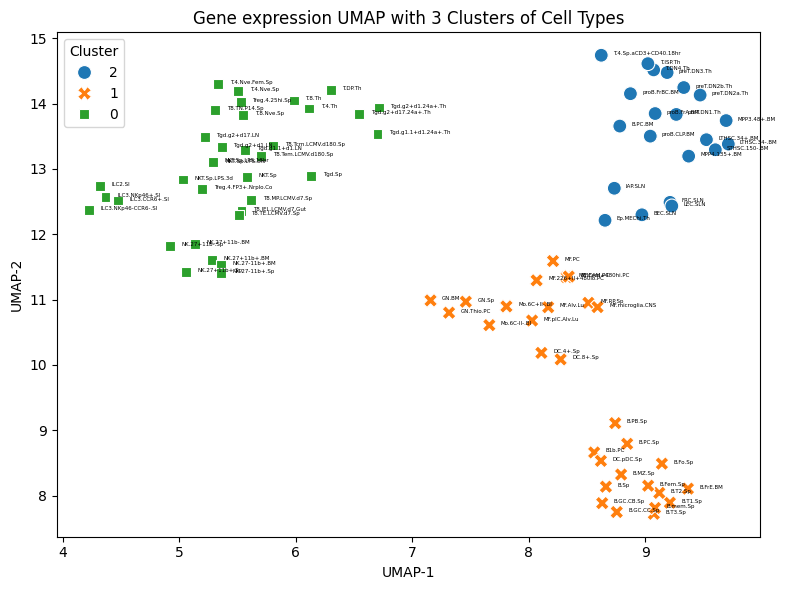

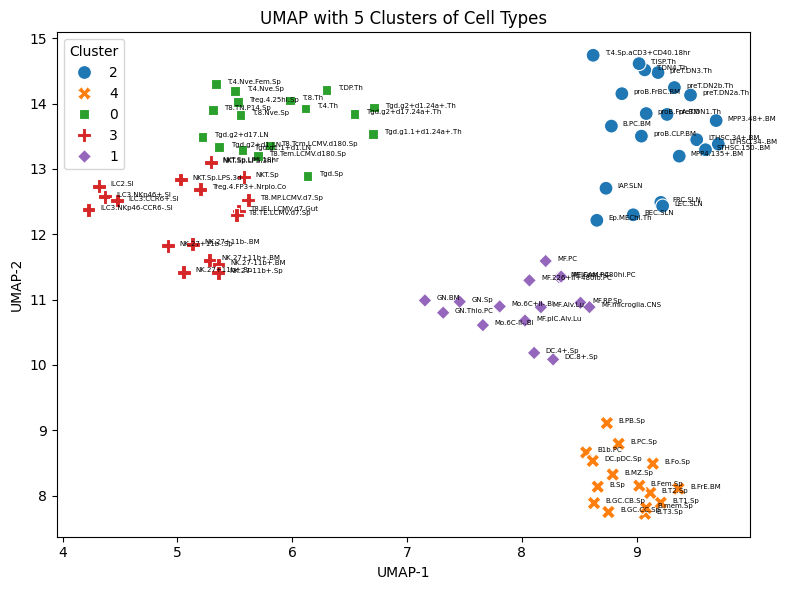

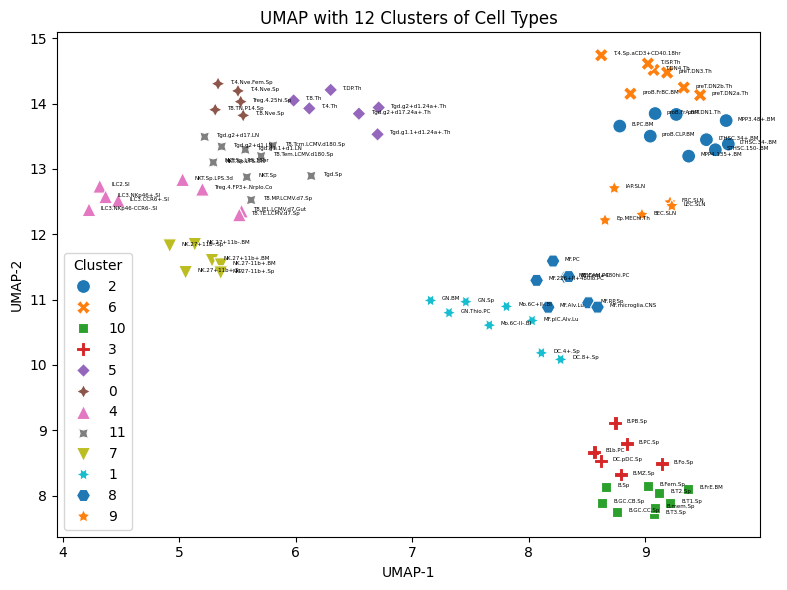


KMeans Clustering Summary (k=3):


,kmeans3,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."



KMeans Clustering Summary (k=5):


,kmeans5,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
3,3,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."
4,4,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."



KMeans Clustering Summary (k=12):


,kmeans12,CellType
0,0,"[T.4.Nve.Sp, T.4.Nve.Fem.Sp, T.8.Nve.Sp, Treg...."
1,1,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
2,10,"[B.FrE.BM, B.T1.Sp, B.T2.Sp, B.T3.Sp, B.Sp, B...."
3,11,"[T8.MP.LCMV.d7.Sp, T8.Tcm.LCMV.d180.Sp, T8.Tem..."
4,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
5,3,"[B1b.PC, B.MZ.Sp, B.Fo.Sp, B.PB.Sp, B.PC.Sp, D..."
6,4,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."
7,5,"[T.DP.Th, T.4.Th, T.8.Th, Tgd.g2+d17.24a+.Th, ..."
8,6,"[proB.FrBC.BM, preT.DN2a.Th, preT.DN2b.Th, pre..."
9,7,"[NK.27+11b-.BM, NK.27+11b+.BM, NK.27-11b+.BM, ..."


In [12]:
from sklearn.cluster import KMeans

# Prepare DataFrame
umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
umap_RNA_seq["CellType"] = RNA_seq_T.index

# kmeans with 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42)
umap_RNA_seq["kmeans3"] = kmeans3.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans3", style="kmeans3", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=4)

plt.title("Gene expression UMAP with 3 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=42)
umap_RNA_seq["kmeans5"] = kmeans5.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans5", style="kmeans5", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=5)

plt.title("UMAP with 5 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 12 clusters (amount cell types)
kmeans12 = KMeans(n_clusters=12, random_state=42)
umap_RNA_seq["kmeans12"] = kmeans12.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans12", style="kmeans12", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=4)

plt.title("UMAP with 12 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# table view of cell types
for k in [3, 5, 12]:
    cluster_col = f"kmeans{k}"
    kmeans_summary = umap_RNA_seq.groupby(cluster_col)["CellType"].apply(list).reset_index()
    print(f"\nKMeans Clustering Summary (k={k}):")
    display(kmeans_summary)


now we will perform leiden clustering to see how it compares

In [6]:
RNA_seq.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0610005C13Rik,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
0610007P14Rik,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
0610009B22Rik,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
0610009L18Rik,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
0610009O20Rik,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


C:\Users\helen\AppData\Local\Temp\ipykernel_6520\3547120202.py:13: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0)


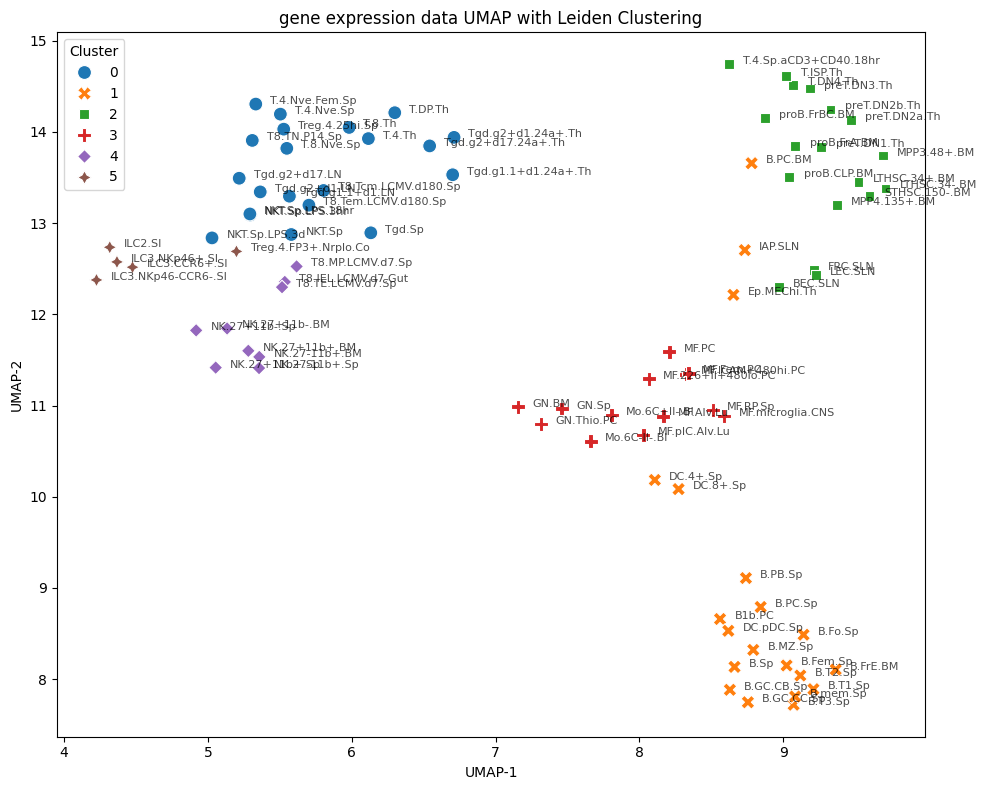

In [7]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
adata = ad.AnnData(X=RNA_seq_T.values)
adata.obs_names = RNA_seq_T.index
adata.obsm["X_umap"] = umap_RNA_prep

sc.pp.neighbors(adata, use_rep="X", n_neighbors=10, random_state=42)
sc.tl.leiden(adata, resolution=1.0)

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].values
umap_RNA_seq["Leiden_Cluster"].to_csv("leiden_clusters.csv")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_RNA_seq, x="UMAP1", y="UMAP2",
    hue="Leiden_Cluster", style="Leiden_Cluster",
    s=100, palette="tab10"
)
for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row.name, fontsize=8, alpha=0.7)

plt.title("gene expression data UMAP with Leiden Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()




we will visualize grouped cell types in a table and countplot


Cluster 0:
  - T.DP.Th
  - T.4.Th
  - T.8.Th
  - T.4.Nve.Sp
  - T.4.Nve.Fem.Sp
  - T.8.Nve.Sp
  - Treg.4.25hi.Sp
  - T8.TN.P14.Sp
  - T8.Tcm.LCMV.d180.Sp
  - T8.Tem.LCMV.d180.Sp
  - NKT.Sp
  - NKT.Sp.LPS.3hr
  - NKT.Sp.LPS.18hr
  - NKT.Sp.LPS.3d
  - Tgd.g2+d17.24a+.Th
  - Tgd.g2+d17.LN
  - Tgd.g2+d1.24a+.Th
  - Tgd.g2+d1.LN
  - Tgd.g1.1+d1.24a+.Th
  - Tgd.g1.1+d1.LN
  - Tgd.Sp

Cluster 1:
  - B.FrE.BM
  - B1b.PC
  - B.T1.Sp
  - B.T2.Sp
  - B.T3.Sp
  - B.Sp
  - B.Fem.Sp
  - B.MZ.Sp
  - B.Fo.Sp
  - B.mem.Sp
  - B.GC.CB.Sp
  - B.GC.CC.Sp
  - B.PB.Sp
  - B.PC.Sp
  - B.PC.BM
  - DC.4+.Sp
  - DC.8+.Sp
  - DC.pDC.Sp
  - IAP.SLN
  - Ep.MEChi.Th

Cluster 2:
  - LTHSC.34-.BM
  - LTHSC.34+.BM
  - STHSC.150-.BM
  - MPP4.135+.BM
  - proB.CLP.BM
  - proB.FrA.BM
  - proB.FrBC.BM
  - preT.DN1.Th
  - preT.DN2a.Th
  - preT.DN2b.Th
  - preT.DN3.Th
  - T.DN4.Th
  - T.ISP.Th
  - T.4.Sp.aCD3+CD40.18hr
  - MPP3.48+.BM
  - FRC.SLN
  - BEC.SLN
  - LEC.SLN

Cluster 3:
  - GN.BM
  - GN.Sp
  - GN.Thio.PC
  - Mo.

C:\Users\helen\AppData\Local\Temp\ipykernel_6520\933239843.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_6520\933239843.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=leiden_col, data=umap_RNA_seq, palette="tab10")


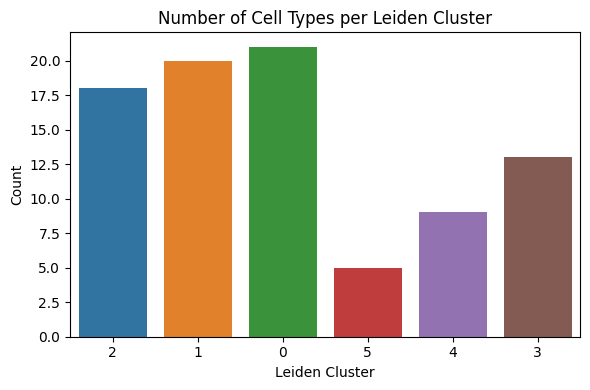


Leiden Clustering Summary:


,Leiden_Cluster,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
3,3,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
4,4,"[T8.IEL.LCMV.d7.Gut, T8.TE.LCMV.d7.Sp, T8.MP.L..."
5,5,"[Treg.4.FP3+.Nrplo.Co, ILC2.SI, ILC3.NKp46-CCR..."


In [10]:

leiden_col = "Leiden_Cluster"
if leiden_col not in umap_RNA_seq.columns:
    umap_RNA_seq[leiden_col] = adata.obs["leiden"].values

# Add CellType column if missing
if "CellType" not in umap_RNA_seq.columns:
    umap_RNA_seq["CellType"] = umap_RNA_seq.index

clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))

for cluster, cells in clustered_cell_types.items():
    print(f"\nCluster {cluster}:")
    for cell in cells:
        print(f"  - {cell}")

plt.figure(figsize=(6, 4))
sns.countplot(x=leiden_col, data=umap_RNA_seq, palette="tab10")
plt.title("Number of Cell Types per Leiden Cluster")
plt.xlabel("Leiden Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].astype(str).reindex(umap_RNA_seq.index)
leiden_summary = umap_RNA_seq.groupby(leiden_col)["CellType"].apply(list).reset_index()
print("\nLeiden Clustering Summary:")
display(leiden_summary)


now we will compare clustering via umap and kmeans

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans5_labels = kmeans5.fit_predict(umap_embedding)
umap_RNA_seq["KMeans_Cluster"] = kmeans5_labels.astype(str)

ari = adjusted_rand_score(umap_RNA_seq["Leiden_Cluster"], umap_RNA_seq["KMeans_Cluster"])
nmi = normalized_mutual_info_score(umap_RNA_seq["Leiden_Cluster"], umap_RNA_seq["KMeans_Cluster"])

print(f"Adjusted Rand Index (KMeans vs. Leiden): {ari:.3f}")
print(f"Normalized Mutual Information (KMeans vs. Leiden): {nmi:.3f}")

Adjusted Rand Index (KMeans vs. Leiden): 0.706
Normalized Mutual Information (KMeans vs. Leiden): 0.796


After matching: 84 samples


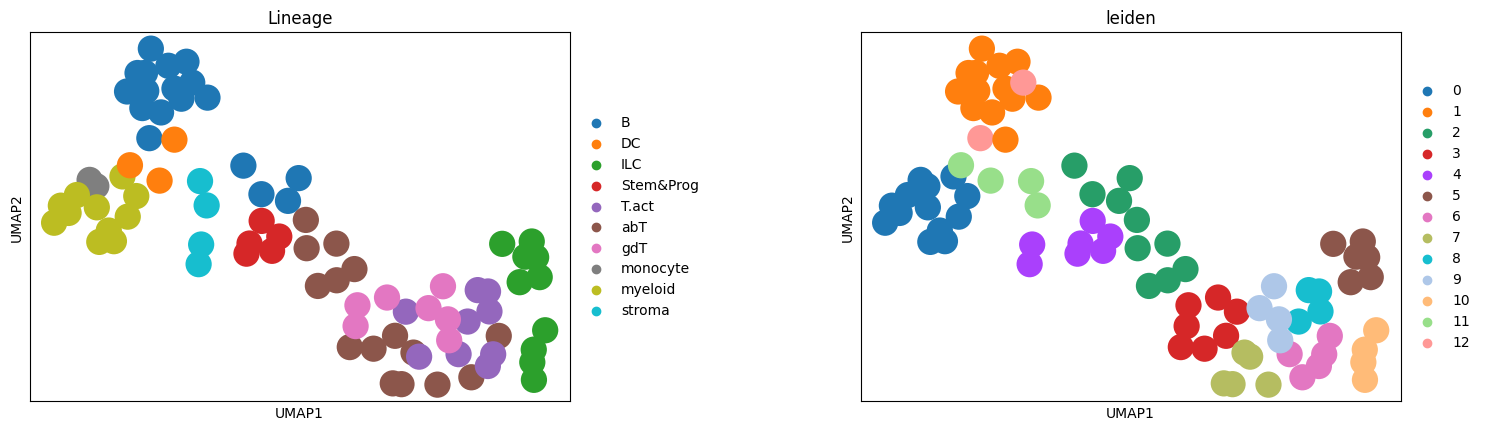

['LTHSC.34-.BM' 'LTHSC.34+.BM' 'STHSC.150-.BM' 'MPP4.135+.BM'
 'proB.CLP.BM' 'proB.FrA.BM' 'proB.FrBC.BM' 'B.FrE.BM' 'B1b.PC' 'B.T1.Sp'
 'B.T2.Sp' 'B.T3.Sp' 'B.Sp' 'B.Fem.Sp' 'B.MZ.Sp' 'B.Fo.Sp' 'B.mem.Sp'
 'B.GC.CB.Sp' 'B.GC.CC.Sp' 'B.PB.Sp' 'B.PC.Sp' 'B.PC.BM' 'preT.DN1.Th'
 'preT.DN2a.Th' 'preT.DN2b.Th' 'preT.DN3.Th' 'T.DN4.Th' 'T.ISP.Th'
 'T.DP.Th' 'T.4.Th' 'T.8.Th' 'T.4.Nve.Sp' 'T.4.Nve.Fem.Sp' 'T.8.Nve.Sp'
 'T.4.Sp.aCD3+CD40.18hr' 'Treg.4.FP3+.Nrplo.Co' 'Treg.4.25hi.Sp'
 'T8.TN.P14.Sp' 'T8.TE.LCMV.d7.Sp' 'T8.MP.LCMV.d7.Sp'
 'T8.Tcm.LCMV.d180.Sp' 'T8.Tem.LCMV.d180.Sp' 'NKT.Sp' 'NKT.Sp.LPS.3hr'
 'NKT.Sp.LPS.18hr' 'NKT.Sp.LPS.3d' 'Tgd.g2+d17.24a+.Th' 'Tgd.g2+d17.LN'
 'Tgd.g2+d1.24a+.Th' 'Tgd.g2+d1.LN' 'Tgd.g1.1+d1.24a+.Th' 'Tgd.g1.1+d1.LN'
 'Tgd.Sp' 'NK.27+11b-.BM' 'NK.27+11b+.BM' 'NK.27-11b+.BM' 'NK.27+11b-.Sp'
 'NK.27+11b+.Sp' 'NK.27-11b+.Sp' 'ILC2.SI' 'ILC3.NKp46-CCR6-.SI'
 'ILC3.NKp46+.SI' 'ILC3.CCR6+.SI' 'MPP3.48+.BM' 'GN.BM' 'GN.Sp'
 'GN.Thio.PC' 'Mo.6C+II-.Bl' 'Mo.6C-II-.Bl' 

c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:49: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_label = type_of_target(labels_true)
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:49: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_label = type_of_target(labels_true)
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:49: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_label = type_of_target(labels_true)
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:49: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_labe

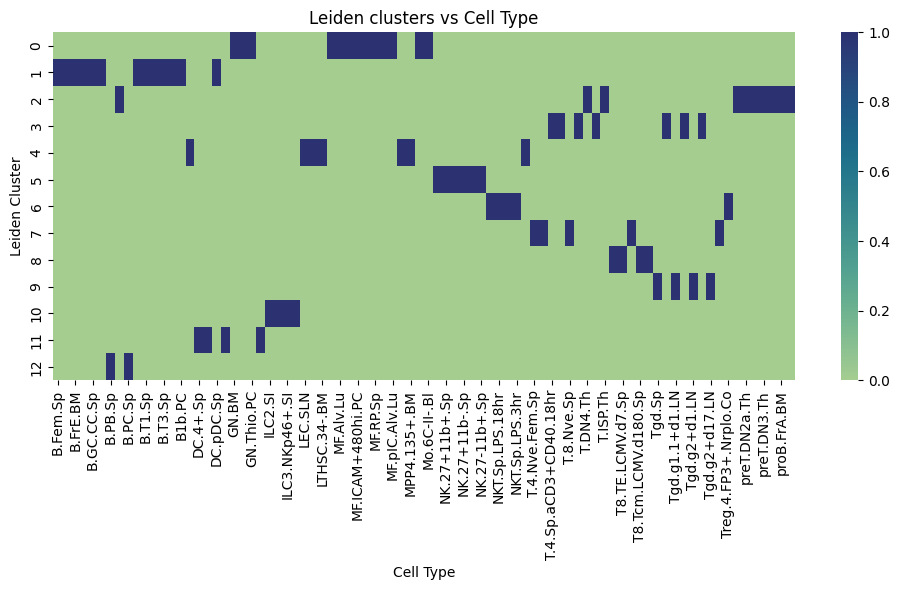

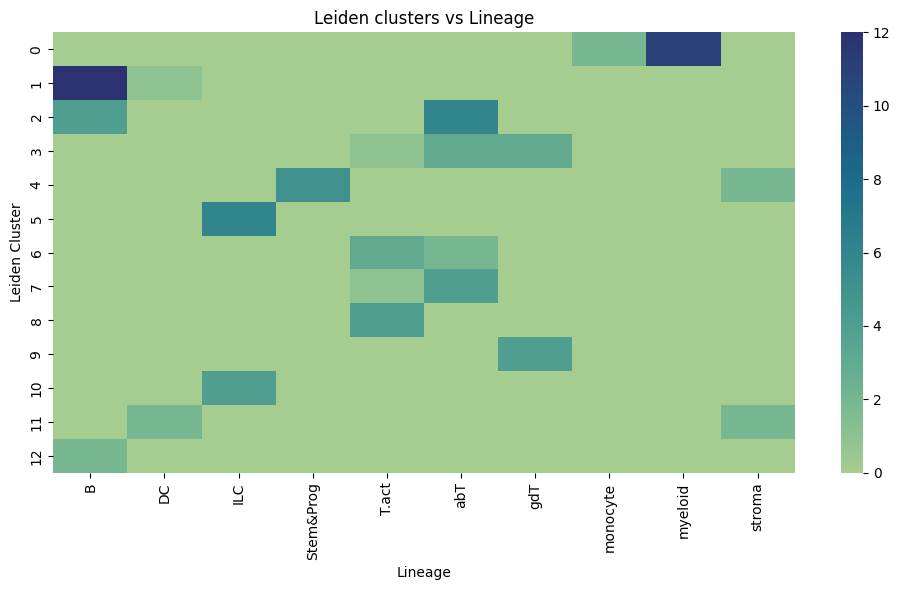

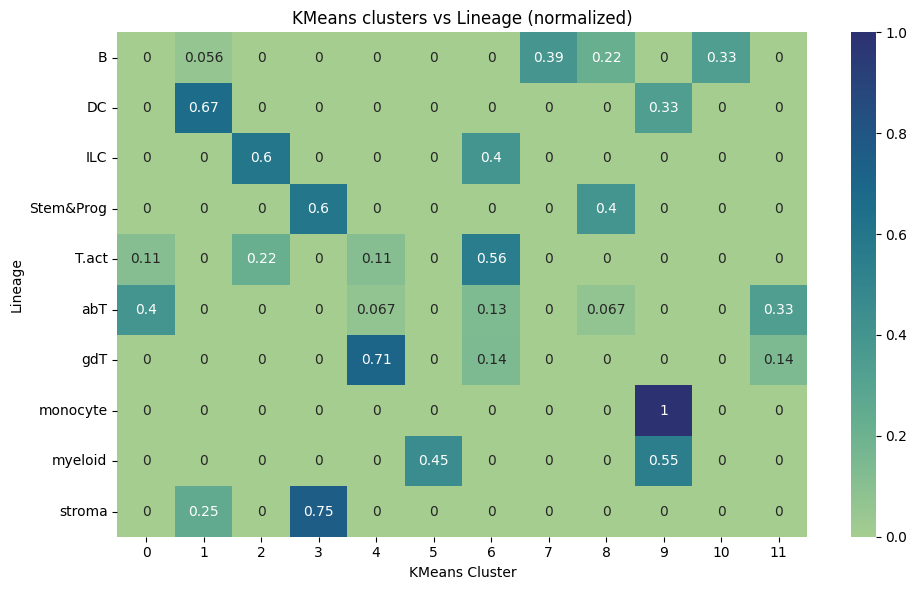

In [36]:

import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Paths
RNA_seq_path = r"C:\Users\helen\Downloads\datasets\mmc2.csv"
Cell_population_qc_path = r"C:\Users\helen\Downloads\datasets\mmc1.xlsx"

# Load RNA-seq and QC metadata
RNA_seq = pd.read_csv(RNA_seq_path, index_col=0).T
RNA_seq = np.log1p(RNA_seq.apply(pd.to_numeric, errors='coerce'))
qc_meta = pd.read_excel(Cell_population_qc_path, index_col=0)

# Match sample names
qc_meta.index = qc_meta.index.str.replace(r"#\d+", "", regex=True)
RNA_seq.index = RNA_seq.index.str.replace(r"#\d+", "", regex=True)

# Drop not matching and NaNs
RNA_seq = RNA_seq.dropna(axis=0, how='any').dropna(axis=1, how='any')
qc_meta = qc_meta.loc[~qc_meta.index.duplicated(keep='first')]

common_samples = RNA_seq.index.intersection(qc_meta.index)
RNA_seq = RNA_seq.loc[common_samples]
qc_meta = qc_meta.loc[common_samples]

print(f"After matching: {len(common_samples)} samples")

# Convert QC columns to numeric
numeric_cols = [
    'InputCellNumber', 'PF.reads', '%chrM.mapped',
    'Paired.read.after.removing.PCR.duplication',
    '%fragment.1Kb_TSS', 'Replicate.cor'
]
for col in numeric_cols:
    if col in qc_meta.columns:
        qc_meta[col] = pd.to_numeric(qc_meta[col], errors='coerce')

# Create AnnData object
adata = AnnData(X=RNA_seq.values)
adata.obs_names = RNA_seq.index
adata.var_names = RNA_seq.columns
adata.obs = qc_meta.copy()

# PCA,neighbors,UMAP
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)

# Leiden clustering
sc.tl.leiden(adata, resolution=3.2)
adata.obs['leiden'] = adata.obs['leiden'].astype(str)

# clean plotting columns
for col in ['CellType', 'Lineage', 'leiden']:
    adata.obs[col] = adata.obs[col].astype(str).fillna("Unknown")

#UMAP plot
sc.pl.umap(adata, color=["Lineage", "leiden"], wspace=0.4, sort_order=False)

#check if colums are clen
print(adata.obs["CellType"].unique())
print(adata.obs["Lineage"].unique())
print(adata.obs["leiden"].unique())


# Leiden at multiple resolutions
print("\nLeiden clustering summary:")
for r in [0.2, 0.6, 1.0, 2.0]:
    key = f'leiden_{r}'
    sc.tl.leiden(adata, resolution=r, key_added=key)
    n_clusters = adata.obs[key].nunique()
    print(f"Resolution {r}: {n_clusters} clusters")

# KMeans clustering on UMAP coordinates
kmeans = KMeans(n_clusters=12, random_state=42)
adata.obs['kmeans12'] = kmeans.fit_predict(adata.obsm['X_umap']).astype(str)

# comparison kmeans/leiden: ARI and NMI
ari = adjusted_rand_score(adata.obs["CellType"], adata.obs["leiden"])
nmi = normalized_mutual_info_score(adata.obs["CellType"], adata.obs["leiden"])
ari_kmeans = adjusted_rand_score(adata.obs["CellType"], adata.obs["kmeans12"])
nmi_kmeans = normalized_mutual_info_score(adata.obs["CellType"], adata.obs["kmeans12"])

print(f"\nClustering Evaluation:")
print(f"Leiden vs CellType — ARI: {ari:.3f}, NMI: {nmi:.3f}")
print(f"KMeans vs CellType — ARI: {ari_kmeans:.3f}, NMI: {nmi_kmeans:.3f}")

# Save AnnData object
adata.write("adata_qc_integrated.h5ad")

# Heatmaps
def plot_heatmap(df, title, xlabel, ylabel, normalize=False):
    if normalize:
        df = df.div(df.sum(axis=1), axis=0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df, cmap="crest", annot=normalize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Heatmap: leiden vs CellType
ct_cluster = pd.crosstab(adata.obs["leiden"], adata.obs["CellType"])
plot_heatmap(ct_cluster, "Leiden clusters vs Cell Type", "Cell Type", "Leiden Cluster")

# Heatmap: leiden vs Lineage
lineage_cluster = pd.crosstab(adata.obs["leiden"], adata.obs["Lineage"])
plot_heatmap(lineage_cluster, "Leiden clusters vs Lineage", "Lineage", "Leiden Cluster")

# Heatmap: kmeans vs Lineage (normalized)
kmeans_lineage = pd.crosstab(adata.obs["Lineage"], adata.obs["kmeans12"])
plot_heatmap(kmeans_lineage, "KMeans clusters vs Lineage (normalized)", "KMeans Cluster", "Lineage", normalize=True)

# Final UMAP: All clustering results
# sc.pl.umap(adata, color=["CellType", "Lineage", "leiden", "kmeans12"], wspace=0.4)


In [31]:


# correlate clusters to celltype
import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Load RNA-seq data
RNA_seq_path = r"C:\Users\helen\Downloads\datasets\mmc2.csv"
RNA_seq = pd.read_csv(RNA_seq_path, index_col=0)
RNA_seq_T = RNA_seq.T
RNA_seq_T_log = np.log1p(RNA_seq_T)

# Load QC metadata
Cell_population_qc_path = r"C:\Users\helen\Downloads\datasets\mmc1.xlsx"
qc_meta= pd.read_excel(Cell_population_qc_path, index_col=0)

#match names to only keep ones that match
qc_meta.index = qc_meta.index.str.replace(r"#\d+", "", regex=True)
RNA_seq_T_log.index = RNA_seq_T_log.index.str.replace(r"#\d+", "", regex=True)

# all RNA-seq values gotta be numeric
RNA_seq_T_log = RNA_seq_T_log.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns with NaN values
RNA_seq_T_log = RNA_seq_T_log.dropna(axis=0, how='any')
RNA_seq_T_log = RNA_seq_T_log.dropna(axis=1, how='any')

# Ensure numeric columns in qc_meta are numeric
numeric_cols = ['InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS', 'Replicate.cor']
for col in numeric_cols:
    if col in qc_meta.columns:
        qc_meta[col] = pd.to_numeric(qc_meta[col], errors='coerce')

#check if index names match
print("Before intersecting:")
print("RNA samples:", RNA_seq_T_log.shape[0])
print("QC samples:", qc_meta.shape[0])
# Check for name mismatches
unmatched = RNA_seq_T_log.index.difference(qc_meta.index)
print(f"Unmatched samples after stripping: {len(unmatched)}")

qc_meta = qc_meta.loc[~qc_meta.index.duplicated(keep='first')]
common_samples = RNA_seq_T_log.index.intersection(qc_meta.index)
RNA_seq_T_log = RNA_seq_T_log.loc[common_samples]
qc_meta = qc_meta.loc[common_samples]

# Create AnnData
adata = AnnData(X=RNA_seq_T_log.values)
adata.obs_names = RNA_seq_T_log.index
adata.var_names = RNA_seq_T_log.columns
adata.obs = qc_meta.copy()

# pca, UMAP, leiden clustering
sc.pp.pca(adata, n_comps=50)

sc.pp.neighbors(adata, use_rep='X', n_neighbors=10)
sc.tl.leiden(adata, resolution=3.2)
adata.obs['leiden'] = adata.obs['leiden'].astype(str)

sc.tl.umap(adata) 
sc.pl.umap(adata, color=["CellType", "Lineage", "leiden"], wspace=0.4)

print(adata.obs["CellType"].value_counts())
print("Missing values:")
print(adata.obs[["CellType", "Lineage", "leiden"]].isnull().sum())
# checking for wrong types
print("\nUnique types per column:")
for col in ["CellType", "Lineage", "leiden"]:
    print(f"{col}:", adata.obs[col].dropna().map(type).value_counts())

#clean up columns
for col in ["CellType", "Lineage", "leiden"]:
    adata.obs[col] = adata.obs[col].astype(str).fillna("Unknown")

sc.pl.umap(adata, color=["CellType", "Lineage", "leiden"], wspace=0.4)

# Leiden clustering find right resolution
for r in [0.2, 0.6, 1.0, 2.0]:
    sc.tl.leiden(adata, resolution=r, key_added=f'leiden_{r}')
    print(f"Resolution {r}: {adata.obs[f'leiden_{r}'].nunique()} clusters")

sc.pp.neighbors(adata, use_rep='X', n_neighbors=10)
sc.tl.leiden(adata, resolution=3.2)
adata.obs['leiden'] = adata.obs['leiden'].astype(str)

#kMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=42)
adata.obs['kmeans12'] = kmeans.fit_predict(adata.obsm['X_umap']).astype(str)

#check how well kmeans and leiden correlate
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(adata.obs["CellType"], adata.obs["leiden"])
nmi = normalized_mutual_info_score(adata.obs["CellType"], adata.obs["leiden"])
print(f"Leiden Clustering -> CellType ARI: {ari:.3f}, NMI: {nmi:.3f}")
ari_kmeans = adjusted_rand_score(adata.obs["CellType"], adata.obs["kmeans12"])
nmi_kmeans = normalized_mutual_info_score(adata.obs["CellType"], adata.obs["kmeans12"])
print(f"KMeans Clustering -> CellType ARI: {ari_kmeans:.3f}, NMI: {nmi_kmeans:.3f}")

# Save Anndata object
adata.write("adata_qc_integrated.h5ad")

# visualize leiden and heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of Leiden vs CellType (from QC metadata)
ct_cluster = pd.crosstab(adata.obs["leiden"], adata.obs["CellType"])

plt.figure(figsize=(10, 6))
sns.heatmap(ct_cluster, cmap="crest")
plt.title("correlating leiden clusters to cell types")
plt.xlabel("Cell Type")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()


# Heatmap cluster to cell type correlation
heatmap_data = pd.crosstab(adata.obs["leiden"], adata.obs["Lineage"])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="crest")
plt.title("correlating leiden clusters to lineages")
plt.xlabel("Lineage")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

# heatmap of correlation kmeans clusters to cell types
heatmap_data = pd.crosstab(adata.obs["Lineage"], adata.obs["kmeans12"])
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_normalized, cmap="crest")
plt.title("KMeans Clusters vs. Lineage")
plt.xlabel("KMeans Cluster")
plt.ylabel("Lineage")
plt.tight_layout()
plt.show()

#plotting umap with leiden and kmeans clusters
sc.pl.umap(adata, color=["CellType", "Lineage", "leiden", "kmeans12"], wspace=0.4)

#%pip install openpyxl
#import pandas as pd
#Cell_population_qc_path = r"C:\Users\helen\Downloads\datasets\mmc1.xlsx"
#qc_metadata = pd.read_excel(Cell_population_qc_path, index_col=0)

# match names
#qc_metadata.index = qc_metadata.index.str.replace(r"#\d+", "", regex=True)
#qc_metadata.index.name = "SampleName"

# check if index names match
#matched = qc_metadata.loc[qc_metadata.index.intersection(adata.obs_names)]

# adding columsns to adata.obs
#adata.obs = adata.obs.join(matched[["CellType", "Lineage", "CellFamily", "Organ"]])

# majority celltypefor cluster annotations
#cluster_annotations = (
 #   adata.obs.groupby("leiden")["CellType"]
  #  .agg(lambda x: x.value_counts().index[0])  # get most common
   # .to_dict()
#)

# Map annotating cell type to clusters
#adata.obs["leiden_annotated"] = adata.obs["leiden"].map(cluster_annotations)

#7. Plot annotated UMAP
#import scanpy as sc
#sc.pl.umap(adata, color="leiden_annotated", title="Leiden Cluster Annotations", legend_loc="on data")


Before intersecting:
RNA samples: 86
QC samples: 181
Unmatched samples after stripping: 2


TypeError: bad operand type for unary -: 'str'

<Figure size 2688x480 with 0 Axes>